# <en><center>Basic Manipulation</center></en>

## Table of Contents

- [Indexing, Labelling & Ordering](#Indexing,-Labelling-&-Ordering)
- [Slicing & Filtering](#Slicing-&-Filtering)
- [Replacing & Thresholding](#Replacing-&-Thresholding)
- [Removing & Adding Data](#Removing-&-Adding-Data)
- [Apply, Map and Vectorized Functions](#Apply,-Map-&-Vectorized-Functions)
- [Summary](#Summary)

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Indexing, Labelling & Ordering

### Dataset

In [6]:
data_file = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Portfolio Projects\\Data Sets\\AB_NYC_2019.csv\\AB_NYC_2019.csv"

In [8]:
df = pd.read_csv(data_file)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Indexing

In [9]:
df2 = df.set_index("id")

In [10]:
df2.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [13]:
df2.name[2539]

'Clean & quiet apt home by the park'

In [14]:
df2.host_id

id
2539            2787
2595            2845
3647            4632
3831            4869
5022            7192
              ...   
36484665     8232441
36485057     6570630
36485431    23492952
36485609    30985759
36487245    68119814
Name: host_id, Length: 48895, dtype: int64

In [21]:
df2.neighbourhood_group

id
2539         Brooklyn
2595        Manhattan
3647        Manhattan
3831         Brooklyn
5022        Manhattan
              ...    
36484665     Brooklyn
36485057     Brooklyn
36485431    Manhattan
36485609    Manhattan
36487245    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

In [26]:
df3 = df.groupby("room_type").mean()
df3.index

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object', name='room_type')

In [28]:
df3.reset_index()

,room_type,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Entire home/apt,1.843818e+07,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304
1,Private room,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
2,Shared room,2.300378e+07,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862


In [27]:
df3

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Entire home/apt,1.843818e+07,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304
Private room,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
Shared room,2.300378e+07,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862


If you want to reset the column and delete the previous index

In [29]:
df3.reset_index(drop = True)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1.843818e+07,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304
1,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
2,2.300378e+07,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862


### Sort Index

- Sort the index after setting a new index.
- There are significant performance gains for large data frames
- Use sort_values

In [32]:
df3.sort_index(ascending = False)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Shared room,2.300378e+07,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862
Private room,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
Entire home/apt,1.843818e+07,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304


In [36]:
df.sort_values(["neighbourhood_group", "host_name"])
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [37]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [38]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [39]:
df.sort_values(["neighbourhood_group", "host_name"], ascending = [False, True], inplace = True)

In [41]:
df["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

### Rank

- Sorting with collision detection

In [43]:
dfp = df.sort_values("price", ascending= False)
dfp[["id","host_name","price"]].head(5)

,id,host_name,price
9151,7003697,Kathrine,10000
17692,13894339,Erin,10000
29238,22436899,Jelena,10000
12342,9528920,Amy,9999
40433,31340283,Matt,9999


In [45]:
dfp["price_rank"] = dfp.price.rank(method = "average", ascending = False)

In [48]:
dfp[["id","host_name","price","price_rank"]].head(5)

,id,host_name,price,price_rank
9151,7003697,Kathrine,10000,2.0
17692,13894339,Erin,10000,2.0
29238,22436899,Jelena,10000,2.0
12342,9528920,Amy,9999,5.0
40433,31340283,Matt,9999,5.0


#### Key Takeaways:
    
- set_index
- reset_index
- sort_values
- unique
- value_counts
- rank

## Slicing & Filtering

### Dataset

In [49]:
data_file = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Portfolio Projects\\Data Sets\\AB_NYC_2019.csv\\AB_NYC_2019.csv"

In [70]:
df = pd.read_csv(data_file)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Slicing Columns

In [51]:
df["host_name"]

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

In [52]:
df[["host_name", "neighbourhood_group"]]

,host_name,neighbourhood_group
0,John,Brooklyn
1,Jennifer,Manhattan
2,Elisabeth,Manhattan
3,LisaRoxanne,Brooklyn
4,Laura,Manhattan
...,...,...
48890,Sabrina,Brooklyn
48891,Marisol,Brooklyn
48892,Ilgar & Aysel,Manhattan
48893,Taz,Manhattan


In [53]:
df[df["host_name"] == 'Taz']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
31463,24491624,43rd Street=TIME SQUARE\nPRIVATE BEDROOM,30985759,Taz,Manhattan,Hell's Kitchen,40.75780,-73.99211,Private room,116,1,95,2019-07-04,6.42,6,280
31517,24539281,43rd Street “TIME SQUARE”\nSingle bed.,30985759,Taz,Manhattan,Hell's Kitchen,40.75792,-73.99172,Shared room,65,1,108,2019-06-23,7.33,6,325
37598,29827403,“TIME SQUARE” 43rd Street\nBig Bedroom on 1st ...,30985759,Taz,Manhattan,Hell's Kitchen,40.75988,-73.99123,Private room,135,1,50,2019-07-07,6.20,6,316
37615,29831106,TIME SQUARE” 43rd street\nPrivate room on 1st ...,30985759,Taz,Manhattan,Hell's Kitchen,40.75938,-73.98986,Private room,145,1,61,2019-07-06,7.50,6,283
37795,29929331,“TIME SQUARE” 43rd street SINGLE BED,30985759,Taz,Manhattan,Hell's Kitchen,40.75964,-73.99002,Shared room,70,1,59,2019-07-04,7.47,6,314
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [54]:
df[df.host_name == "Taz"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
31463,24491624,43rd Street=TIME SQUARE\nPRIVATE BEDROOM,30985759,Taz,Manhattan,Hell's Kitchen,40.75780,-73.99211,Private room,116,1,95,2019-07-04,6.42,6,280
31517,24539281,43rd Street “TIME SQUARE”\nSingle bed.,30985759,Taz,Manhattan,Hell's Kitchen,40.75792,-73.99172,Shared room,65,1,108,2019-06-23,7.33,6,325
37598,29827403,“TIME SQUARE” 43rd Street\nBig Bedroom on 1st ...,30985759,Taz,Manhattan,Hell's Kitchen,40.75988,-73.99123,Private room,135,1,50,2019-07-07,6.20,6,316
37615,29831106,TIME SQUARE” 43rd street\nPrivate room on 1st ...,30985759,Taz,Manhattan,Hell's Kitchen,40.75938,-73.98986,Private room,145,1,61,2019-07-06,7.50,6,283
37795,29929331,“TIME SQUARE” 43rd street SINGLE BED,30985759,Taz,Manhattan,Hell's Kitchen,40.75964,-73.99002,Shared room,70,1,59,2019-07-04,7.47,6,314
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Boolean Mask

In [55]:
df.host_name == "Taz"

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893     True
48894    False
Name: host_name, Length: 48895, dtype: bool

In [57]:
(df.host_name == "Taz").sum()

6

In [59]:
mask = df.host_name == "Taz"
df[mask].head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Taz,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Taz,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [71]:
quick_n_cheap = (df.price<100) & (df.minimum_nights <3)
quick_n_cheap.sum()

12129

In [72]:
df[quick_n_cheap].head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [73]:
reviews_consistent = df[(df.reviews_per_month > 3) | (df.number_of_reviews > 50)]
reviews_consistent.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [74]:
mask = np.logical_or((df.reviews_per_month > 3), (df.number_of_reviews > 50))
df[mask].head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


~ is the logical inversion:

- True becomes False
- False becomes True

In [75]:
df[~mask].head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


### Filtering columns and rows together

- The method is .loc

In [76]:
df.loc[mask, "name"]

3                    Cozy Entire Floor of Brownstone
5          Large Cozy 1 BR Apartment In Midtown East
7                   Large Furnished Room Near B'way 
8                 Cozy Clean Guest Room - Family Apt
9                 Cute & Cozy Lower East Side 1 bdrm
                            ...                     
47848                  Penn House~~~~5 mins from JFK
47967         Cosy Bedroom in the Heart of Manhattan
48031    Large bedroom with private bathroom is suit
48228                1910 Original Rockaway Bungalow
48252                 Cozy Apartment in Midtown West
Name: name, Length: 9588, dtype: object

In [77]:
df.loc[mask, ["name", "host_name"]]

,name,host_name
3,Cozy Entire Floor of Brownstone,LisaRoxanne
5,Large Cozy 1 BR Apartment In Midtown East,Chris
7,Large Furnished Room Near B'way,Shunichi
8,Cozy Clean Guest Room - Family Apt,MaryEllen
9,Cute & Cozy Lower East Side 1 bdrm,Ben
...,...,...
47848,Penn House~~~~5 mins from JFK,Penn
47967,Cosy Bedroom in the Heart of Manhattan,Dayana
48031,Large bedroom with private bathroom is suit,Alex And Mila
48228,1910 Original Rockaway Bungalow,Diana


In [80]:
df.loc[mask, :].head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


### Filtering based on index

- df.iloc[rows, columns]

In [82]:
df.iloc[0, :]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

In [86]:
df.iloc[0, 3]

'John'

Provided Mask Helpers

In [90]:
df.loc[df.price.between(100, 200), "price"].head()

0     149
2     150
5     200
9     150
10    135
Name: price, dtype: int64

In [92]:
df.loc[df.price.isin([100, 200]), "price"].head()

5     200
54    200
63    200
76    200
94    100
Name: price, dtype: int64

In [94]:
(df == "John").any()

id                                False
name                              False
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [95]:
(df == "John").any(axis = 1)

0         True
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

Views vs Copy

In [97]:
df2 = df.copy()

In [98]:
df2["name"][0] = "TESTING"
df2.head(1)

C:\Users\pyria\AppData\Local\Temp\ipykernel_4484\1841758899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["name"][0] = "TESTING"


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,TESTING,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


loc changes the original DataFrame

In [99]:
df2.loc[df2.index == 0, "name"] = "TESTING2"
df2.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,TESTING2,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


While pulling out the name and trying to change it this way does not change the original DataFrame

In [100]:
df2[df2.host_name == "John"]["name"] = "Oh no"
df2.head(1)

C:\Users\pyria\AppData\Local\Temp\ipykernel_4484\4070024825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[df2.host_name == "John"]["name"] = "Oh no"


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,TESTING2,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


## Replacing & Thresholding

#### Dataset

In [37]:
data_file = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Portfolio Projects\\Data Sets\\AB_NYC_2019.csv\\AB_NYC_2019.csv"

In [38]:
df = pd.read_csv(data_file)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

Use Tresh argument for the number of null values that a row needs to contain in order to get dropped

In [ ]:
df.dropna(thresh = 3).info()

How to drop rows according to a specified column

In [11]:
df.dropna(subset = ["last_review"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38843 non-null  int64  
 1   name                            38837 non-null  object 
 2   host_id                         38843 non-null  int64  
 3   host_name                       38827 non-null  object 
 4   neighbourhood_group             38843 non-null  object 
 5   neighbourhood                   38843 non-null  object 
 6   latitude                        38843 non-null  float64
 7   longitude                       38843 non-null  float64
 8   room_type                       38843 non-null  object 
 9   price                           38843 non-null  int64  
 10  minimum_nights                  38843 non-null  int64  
 11  number_of_reviews               38843 non-null  int64  
 12  last_review                     

In [14]:
df.fillna(0).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Generic replace

In [16]:
df.replace("John", "Jono").head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Jono,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [19]:
df["host_name"].replace("John", "Jono").head(1)

0    Jono
Name: host_name, dtype: object

In [21]:
df.host_name.replace("John", "Jono").head(1)

0    Jono
Name: host_name, dtype: object

In [24]:
df.host_name.replace("John", "Jono", limit = 1).head(1)[0]

'Jono'

You can also use a dictionary for key value pairs.

In [26]:
df.replace({"John": "Jono", "Brooklyn": "Brooky"}).head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Jono,Brooky,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


### Thresholding

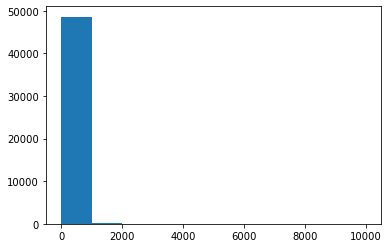

In [39]:
plt.hist(df.price);

Change the scaling to see the outliers

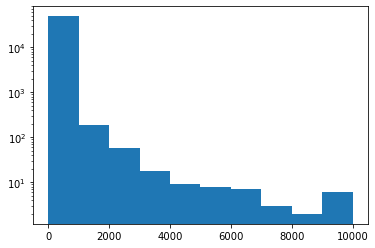

In [30]:
plt.hist(df.price, log = True);

Clipping the data points beyond 1000 into the last bin

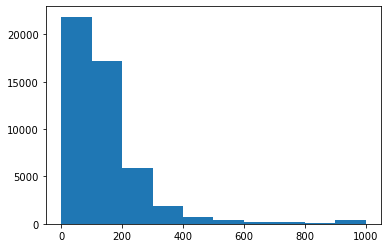

In [31]:
plt.hist(df.price.clip(upper = 1000));

### Recap

- dropna
- fillna
- replace
- clip
- manual thresholding

## Removing & Adding Data

### Dataset

In [40]:
dataset = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Portfolio Projects\\Data Sets\\Astronaut Dataset\\astronauts.csv"

In [41]:
df = pd.read_csv(dataset)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth Date           357 non-null    object 
 5   Birth Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma Mater           356 non-null    object 
 8   Undergraduate Major  335 non-null    object 
 9   Graduate Major       298 non-null    object 
 10  Military Rank        207 non-null    object 
 11  Military Branch      211 non-null    object 
 12  Space Flights        357 non-null    int64  
 13  Space Flight (hr)    357 non-null    int64  
 14  Space Walks          357 non-null    int64  
 15  Space Walks (hr)     357 non-null    flo

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


### Modifying Type of Columns

This is commonly used for:

- Time Series
- Categoricals
- Converting strings to numeric

You can add the format argument to explicitly set the format for the datetime.

In [46]:
birthdate = pd.to_datetime(df["Birth Date"], format = "%m/%d/%Y")
birthdate

0     1967-05-17
1     1936-03-07
2     1946-03-03
3     1951-05-20
4     1930-01-20
         ...    
352   1956-08-23
353   1962-07-26
354   1932-02-07
355   1930-09-24
356   1962-06-29
Name: Birth Date, Length: 357, dtype: datetime64[ns]

In [44]:
birthdate.dt.year

0      1967
1      1936
2      1946
3      1951
4      1930
       ... 
352    1956
353    1962
354    1932
355    1930
356    1962
Name: Birth Date, Length: 357, dtype: int64

In [45]:
df.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [47]:
zarya = pd.to_datetime("1998-11-20")
df["age_at_zarya"] = (zarya - birthdate).astype("timedelta64[Y]")
df.head(3)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,age_at_zarya
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,31.0
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,62.0
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,52.0


In [48]:
df["birth"] = birthdate
df.head(3)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,age_at_zarya,birth
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,...,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,31.0,1967-05-17
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,...,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,62.0,1936-03-07
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,...,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,52.0,1946-03-03


### Categoricals

- Information can be utilized by other libraries that pandas interfaces with.
- You can provide explicit sorting order instead of lexical order.
- Gain massive speed improvements if you group on categories.

In [49]:
df["Military Rank"].unique()

array([nan, 'Colonel', 'Lieutenant Colonel', 'Captain', 'Major General',
       'Commander', 'Lieutenant Commander', 'Brigadier General', 'Major',
       'Lieutenant General', 'Chief Warrant Officer', 'Rear Admiral',
       'Vice Admiral'], dtype=object)

In [50]:
df["Military Rank"].dtype

dtype('O')

In [51]:
df["Military Rank"] = df["Military Rank"].astype("category")
df["Military Rank"].dtype

CategoricalDtype(categories=['Brigadier General', 'Captain', 'Chief Warrant Officer',
                  'Colonel', 'Commander', 'Lieutenant Colonel',
                  'Lieutenant Commander', 'Lieutenant General', 'Major',
                  'Major General', 'Rear Admiral', 'Vice Admiral'],
, ordered=False)

Another way to do it

In [ ]:
pd.Categorical(df["Military Rank"])

### Numeric / String Conversion

In [52]:
df.head(1)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,age_at_zarya,birth
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,...,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,31.0,1967-05-17


You need to turn it into a "string" then a "float" before turning it into an "int" data type.

In [53]:
df.age_at_zarya.astype("str").astype("float").astype("int")

0      31
1      62
2      52
3      47
4      68
       ..
352    42
353    36
354    66
355    68
356    36
Name: age_at_zarya, Length: 357, dtype: int32

### Removing Columns or Rows

In [72]:
df2 = df[["Name","Year","Group"]].copy()
df2.head()

,Name,Year,Group
0,Joseph M. Acaba,2004.0,19.0
1,Loren W. Acton,NaN,NaN
2,James C. Adamson,1984.0,10.0
3,Thomas D. Akers,1987.0,12.0
4,Buzz Aldrin,1963.0,3.0


In [56]:
df2.drop("Group", axis = 1).head()

,Name,Year
0,Joseph M. Acaba,2004.0
1,Loren W. Acton,NaN
2,James C. Adamson,1984.0
3,Thomas D. Akers,1987.0
4,Buzz Aldrin,1963.0


To drop a row, just put in the index value

In [57]:
df2.drop(1).head()

,Name,Year,Group
0,Joseph M. Acaba,2004.0,19.0
2,James C. Adamson,1984.0,10.0
3,Thomas D. Akers,1987.0,12.0
4,Buzz Aldrin,1963.0,3.0
5,Andrew M. Allen,1987.0,12.0


In [58]:
df2.drop(columns = "Group").head()

,Name,Year
0,Joseph M. Acaba,2004.0
1,Loren W. Acton,NaN
2,James C. Adamson,1984.0
3,Thomas D. Akers,1987.0
4,Buzz Aldrin,1963.0


In [59]:
df2.drop(columns = ["Group", "Year"]).head()

,Name
0,Joseph M. Acaba
1,Loren W. Acton
2,James C. Adamson
3,Thomas D. Akers
4,Buzz Aldrin


### Adding Rows

In [70]:
df2.append({"Name": "Samuel Hinton", "Year": 2010, "Group" : 20.0}, ignore_index = True)

C:\Users\pyria\AppData\Local\Temp\ipykernel_19896\4112719858.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2.append({"Name": "Samuel Hinton", "Year": 2010, "Group" : 20.0}, ignore_index = True)


,Name,Year,Group
0,Joseph M. Acaba,2004.0,19.0
1,Loren W. Acton,NaN,NaN
2,James C. Adamson,1984.0,10.0
3,Thomas D. Akers,1987.0,12.0
4,Buzz Aldrin,1963.0,3.0
...,...,...,...
353,Neil W. Woodward III,1998.0,17.0
354,Alfred M. Worden,1966.0,5.0
355,John W. Young,1962.0,2.0
356,George D. Zamka,1998.0,17.0


In [67]:
df_sis = pd.DataFrame({"Name": ["Al Hinton"], "Year": [2010], "Group": [20.0]})
df_sis

,Name,Year,Group
0,Al Hinton,2010,20.0


### Adding Columns

In [73]:
df2["Col1"] = "Whoa"
df2

,Name,Year,Group,Col1
0,Joseph M. Acaba,2004.0,19.0,Whoa
1,Loren W. Acton,NaN,NaN,Whoa
2,James C. Adamson,1984.0,10.0,Whoa
3,Thomas D. Akers,1987.0,12.0,Whoa
4,Buzz Aldrin,1963.0,3.0,Whoa
...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Whoa
353,Neil W. Woodward III,1998.0,17.0,Whoa
354,Alfred M. Worden,1966.0,5.0,Whoa
355,John W. Young,1962.0,2.0,Whoa


In [76]:
df.assign(some_col = "someval")
df.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,age_at_zarya,birth
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,...,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,31.0,1967-05-17
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,...,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,62.0,1936-03-07
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,...,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,52.0,1946-03-03
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,...,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,47.0,1951-05-20
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,...,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,68.0,1930-01-20


In [74]:
df2.insert(0, "FirstName", df.Name.str.split(" ",1 , expand = True)[0])
df2.head()

,FirstName,Name,Year,Group,Col1
0,Joseph,Joseph M. Acaba,2004.0,19.0,Whoa
1,Loren,Loren W. Acton,NaN,NaN,Whoa
2,James,James C. Adamson,1984.0,10.0,Whoa
3,Thomas,Thomas D. Akers,1987.0,12.0,Whoa
4,Buzz,Buzz Aldrin,1963.0,3.0,Whoa


### Lets say that I want to work with rows/columns and I have columns/rows

In [78]:
df3 = df.set_index("Name")
df3.head()

,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,age_at_zarya,birth
Name,,,,,,,,,,,,,,,,,,,,
Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,31.0,1967-05-17
Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,62.0,1936-03-07
James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,52.0,1946-03-03
Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,47.0,1951-05-20
Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,68.0,1930-01-20


In [79]:
df3.T

Name,Joseph M. Acaba,Loren W. Acton,James C. Adamson,Thomas D. Akers,Buzz Aldrin,Andrew M. Allen,Joseph P. Allen,Scott D. Altman,William A. Anders,Clayton C. Anderson,...,Sunita L. Williams,Barry E. Wilmore,Stephanie D. Wilson,G. Reid Wiseman,Peter J. K. Wisoff,David A. Wolf,Neil W. Woodward III,Alfred M. Worden,John W. Young,George D. Zamka
Year,2004.0,NaN,1984.0,1987.0,1963.0,1987.0,1967.0,1995.0,1963.0,1998.0,...,1998.0,2000.0,1996.0,2009.0,1990.0,1990.0,1998.0,1966.0,1962.0,1998.0
Group,19.0,NaN,10.0,12.0,3.0,12.0,6.0,15.0,3.0,17.0,...,17.0,18.0,16.0,20.0,13.0,13.0,17.0,5.0,2.0,17.0
Status,Active,Retired,Retired,Retired,Retired,Retired,Retired,Retired,Retired,Retired,...,Active,Active,Active,Active,Retired,Retired,Retired,Retired,Retired,Retired
Birth Date,5/17/1967,3/7/1936,3/3/1946,5/20/1951,1/20/1930,8/4/1955,6/27/1937,8/15/1959,10/17/1933,2/23/1959,...,9/19/1965,12/29/1962,9/27/1966,11/11/1975,8/16/1958,8/23/1956,7/26/1962,2/7/1932,9/24/1930,6/29/1962
Birth Place,"Inglewood, CA","Lewiston, MT","Warsaw, NY","St. Louis, MO","Montclair, NJ","Philadelphia, PA","Crawsfordsville, IN","Lincoln, IL",Hong Kong,"Omaha, NE",...,"Euclid, OH","Murfreesboro, TN","Boston, MA","Baltimore, MD","Norfolk, VA","Indianapolis, IN","Chicago, IL","Jackson, MI","San Francisco, CA","Jersey City, NJ"
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Female,Male,Male,Male,Male,Male,Male,Male
Alma Mater,University of California-Santa Barbara; Univer...,Montana State University; University of Colorado,US Military Academy; Princeton University,University of Missouri-Rolla,US Military Academy; MIT,Villanova University; University of Florida,DePauw University; Yale University,University of Illinois; US Naval Postgraduate ...,US Naval Academy; Air Force Institute of Techn...,Hastings College; Iowa State University,...,US Naval Academy; Florida Institute of Technology,Tennessee Technological University; University...,Harvard University; University of Texas,Rensselaer Polytechnic Institute; Johns Hopkin...,University of Virginia; Stanford University,Purdue University; Indiana University,MIT; University of Texas-Austin; George Washin...,US Military Academy; University of Michigan,Georgia Institute of Technology,US Naval Academy; Florida Institute of Technology
Undergraduate Major,Geology,Engineering Physics,Engineering,Applied Mathematics,Mechanical Engineering,Mechanical Engineering,Mathematics & Physics,Aeronautical & Astronautical Engineering,Nuclear Engineering,Physics,...,Physical Science,Electrical Engineering,Engineering Science,Computer & Systems Engineering,Physics,Electrical Engineering,Physics,Military Science,Aeronautical Engineering,Mathematics
Graduate Major,Geology,Solar Physics,Aerospace Engineering,Applied Mathematics,Astronautics,Business Administration,Physics,Aeronautical Engineering,Nuclear Engineering,Aerospace Engineering,...,Engineering Management,Electrical Engineering; Aviation Systems,Aerospace Engineering,Systems Engineering,Applied Physics,Medicine,Physics; Business Management,Aeronautical & Astronautical Engineering,NaN,Engineering Management
Military Rank,NaN,NaN,Colonel,Colonel,Colonel,Lieutenant Colonel,NaN,Captain,Major General,NaN,...,Captain,Captain,NaN,Commander,NaN,NaN,Commander,Colonel,Captain,Colonel


### Recap

- df["newcol"] = val
- dtypes
- astype
- drop
- append
- assign
- .T
 

## Apply, Map & Vectorized Functions

In [4]:
data = np.round(np.random.normal(size = (4,3)), 2)
df = pd.DataFrame(data, columns = ["A", "B","C"])
df.head()

,A,B,C
0,-1.06,-0.57,1.35
1,0.52,1.00,0.27
2,-0.30,-0.20,0.01
3,-0.39,-0.90,-2.04


### Apply 

- Used to execute an arbitrary function against an entire dataframe, or a subsection.
- Applies in a vectorised fashion.

In [3]:
df.apply(lambda x: 1 + np.abs(x))

,A,B,C
0,1.82,1.25,1.29
1,1.37,2.07,4.04
2,2.42,1.72,1.83
3,3.61,2.74,1.18


In [4]:
df.A.apply(np.abs)

0    0.82
1    0.37
2    1.42
3    2.61
Name: A, dtype: float64

This does work because x is an array not a number.

In [2]:
def double_if_positive(x):
    if x >0 :
        return 2 * x
    return x

df.apply(double_if_positive)

NameError: name 'df' is not defined

The correct way to do this

In [5]:
def double_if_positive(x):
    x = x.copy()
    x[x>0] *=2
    return x

df.apply(double_if_positive, raw = False)

,A,B,C
0,-1.06,-0.57,2.70
1,1.04,2.00,0.54
2,-0.30,-0.20,0.02
3,-0.39,-0.90,-2.04


### Map

- Similar to apply.
- Operates on pandas series.
- Uses dictionary based inputs instead of an array of values.

In [6]:
series = pd.Series(["Steve", "Alex","Jess","Mark"])

This looks like a find and replace but if nothing is found, you get nothing back in the output.

In [7]:
series.map({"Steve": "Stephen"})

0    Stephen
1        NaN
2        NaN
3        NaN
dtype: object

In [8]:
series.map(lambda d: f"I am {d}")

0    I am Steve
1     I am Alex
2     I am Jess
3     I am Mark
dtype: object

### Vectorized Functions

- Pandas and Numpy have many of these

In [9]:
display(df, df.abs())

,A,B,C
0,-1.06,-0.57,1.35
1,0.52,1.00,0.27
2,-0.30,-0.20,0.01
3,-0.39,-0.90,-2.04


,A,B,C
0,1.06,0.57,1.35
1,0.52,1.00,0.27
2,0.30,0.20,0.01
3,0.39,0.90,2.04


In [10]:
series = pd.Series(["Obi-Wan Kenobi", "Luke Skywalker", "Han Solo","Leia Organa"])

In [11]:
"Luke Skywalker".split()

['Luke', 'Skywalker']

You'll notice that this doesn't work

In [12]:
series.split()

AttributeError: 'Series' object has no attribute 'split'

This is how it works

In [13]:
series.str.split()

0    [Obi-Wan, Kenobi]
1    [Luke, Skywalker]
2          [Han, Solo]
3       [Leia, Organa]
dtype: object

In [14]:
series.str.split(expand = True)

,0,1
0,Obi-Wan,Kenobi
1,Luke,Skywalker
2,Han,Solo
3,Leia,Organa


In [15]:
series.str.contains("Skywalker")

0    False
1     True
2    False
3    False
dtype: bool

In [17]:
series.str.upper()

0    OBI-WAN KENOBI
1    LUKE SKYWALKER
2          HAN SOLO
3       LEIA ORGANA
dtype: object

In [19]:
series.str.upper().str.split()

0    [OBI-WAN, KENOBI]
1    [LUKE, SKYWALKER]
2          [HAN, SOLO]
3       [LEIA, ORGANA]
dtype: object

User Defined Functions

- Lets find the hypotenuse given x and y distances.

In [20]:
data2 = np.random.normal(10, 2, size = (100000, 2))
df2 = pd.DataFrame(data2, columns = ["x", "y"])

In [22]:
hypot = (df2.x**2 + df2.y**2) ** 0.5
print(hypot[0])

14.590039839525156


In [24]:
def hypot1(x, y):
    return np.sqrt(x**2 + y**2)

h1 = []
for index, (x, y) in df2.iterrows():
    h1.append(hypot1(x,y))
print(h1[0])

14.590039839525156


In [25]:
def hypot3(xs, ys):
    return np.sqrt(xs**2 + ys**2)
h3 = hypot3(df2.x, df2.y)
print(h3[0])

14.590039839525156


## Summary

- Boolean Masks
- .loc
- Fillna, dropna
- replace

## Extra Practise - Basics

In this optional practise session, I thought it would be fun to look at some cost of living data from, you guessed it, Kaggle: https://www.kaggle.com/stephenofarrell/cost-of-living

Here are the objectives:

1. Rename the "index" column to "location"
2. Utilise apply to generate two new columns from the location - city and country
3. Realise the easy solution doesn't doesnt work for the United States and create a function for apply to remove specific states.
3. Figure out which country has the most cities listed, and create a dataset from only that country
4. Sort the dataset by the cost of living 'Apartment (1 bedroom) in City Centre'
5. Cry over housing prices if you live in the Bay Area.

After that, feel free to keep playing with the data yourself.


In [26]:
# Code to start you off and manipulate the data. .T is transpose - swap columns and rows
import pandas as pd
data = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\Pandas Bootcamp\\\
P87-Section-4-Basic-Data-Manipulations-Resources\\Section 4 - Extra Example Resources\\cost-of-living.csv"
df = pd.read_csv(data, index_col=0).T.reset_index()
df.head()

,index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,...,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30


## Rename column

In [29]:
df2 = df.rename(columns = {"index":"location"})
df2.head()

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,...,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30


## Get city and country

In [31]:
df2["location"]

0      Saint Petersburg, Russia
1              Istanbul, Turkey
2                 Izmir, Turkey
3             Helsinki, Finland
4             Chisinau, Moldova
                 ...           
155        Melbourne, Australia
156            Perth, Australia
157           Sydney, Australia
158           Alexandria, Egypt
159              Quito, Ecuador
Name: location, Length: 160, dtype: object

In [34]:
df2[["City", "Country"]] = df2.location.str.split(",", n = 1, expand = True)
df2.head()

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",City,Country
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,...,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86,Saint Petersburg,Russia
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43,Istanbul,Turkey
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41,Izmir,Turkey
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,...,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00,Helsinki,Finland
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30,Chisinau,Moldova


In [40]:
df2["Country"] = df2["Country"].apply(lambda x: x if not "," in x else x.split(", ")[-1])

In [41]:
df2["Country"].value_counts()

United States    13
 India           11
 Canada           8
 Poland           6
 Romania          5
                 ..
 South Korea      1
 Denmark          1
 Slovenia         1
 Sri Lanka        1
 Ecuador          1
Name: Country, Length: 82, dtype: int64

In [42]:
df2.head()

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",City,Country
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,...,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86,Saint Petersburg,Russia
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43,Istanbul,Turkey
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41,Izmir,Turkey
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,...,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00,Helsinki,Finland
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30,Chisinau,Moldova


## Figure out which country has the most cities

In [47]:
most_cities = df2["Country"].value_counts().index[0]
most_cities

'United States'

## Create a subset of only that country

In [48]:
df3 = df2[df2.Country == most_cities]
df3

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",City,Country
38,"Austin, TX, United States",13.48,44.92,7.19,4.49,5.39,1.87,1.37,0.75,2.40,...,2.60,3.19,1.04,1.82,10.60,18743.38,890.67,17537.93,Austin,United States
47,"Boston, MA, United States",13.47,62.85,7.18,6.29,6.73,1.75,1.53,0.78,2.62,...,3.68,5.14,1.39,3.40,14.07,18411.02,1534.76,24642.48,Boston,United States
48,"Chicago, IL, United States",13.47,53.87,7.18,4.94,6.29,1.75,1.52,0.70,2.54,...,3.92,3.52,1.47,2.39,12.40,18842.65,1025.73,15972.64,Chicago,United States
53,"Dallas, TX, United States",13.48,44.92,6.51,4.49,5.39,1.69,1.42,0.64,2.20,...,3.54,2.87,1.07,1.99,9.90,17561.12,800.09,16891.52,Dallas,United States
62,"Houston, TX, United States",13.48,53.91,6.74,5.39,5.84,1.81,1.59,0.68,2.03,...,3.09,2.07,1.25,1.59,9.17,18944.36,806.88,18762.48,Houston,United States
69,"Las Vegas, NV, United States",13.47,53.87,7.18,5.39,6.29,1.45,1.06,0.70,1.81,...,2.98,2.99,1.32,1.79,10.05,19092.70,786.60,12507.10,Las Vegas,United States
71,"Los Angeles, CA, United States",13.47,58.36,7.18,5.39,6.29,2.03,1.59,0.87,2.99,...,3.25,2.98,1.81,1.82,11.60,18702.58,951.17,19335.55,Los Angeles,United States
78,"New York, NY, United States",17.97,76.37,8.09,6.29,7.19,1.85,1.59,1.04,3.33,...,5.70,5.33,2.17,3.07,13.56,18118.42,2106.38,34441.93,New York,United States
86,"Phoenix, AZ, United States",10.77,53.87,6.73,3.59,4.49,1.53,1.07,0.51,2.18,...,4.53,3.19,1.38,1.91,9.60,18257.94,678.35,13498.49,Phoenix,United States
88,"Portland, OR, United States",12.58,44.92,6.74,4.49,4.49,1.78,1.35,0.78,2.83,...,3.91,3.67,1.30,1.90,14.63,20494.34,1076.09,16387.06,Portland,United States


## Sort by housing accommodation

In [51]:
key = "Apartment (1 bedroom) in City Centre"
df4 = df3.sort_values(key, ascending = False)
df4[["location", key]]

,location,Apartment (1 bedroom) in City Centre
100,"San Francisco, CA, United States",3131.06
78,"New York, NY, United States",2854.26
47,"Boston, MA, United States",2275.95
71,"Los Angeles, CA, United States",1980.11
102,"Seattle, WA, United States",1919.17
99,"San Diego, CA, United States",1816.10
48,"Chicago, IL, United States",1702.25
38,"Austin, TX, United States",1581.66
88,"Portland, OR, United States",1399.80
53,"Dallas, TX, United States",1322.45


In [8]:
col = "Apartment (1 bedroom) in City Centre"
# your code here

## Despair over the cost of housing